### Fine Tip Clearance Test Objective


### Procedure
- Ensure the drone is positioned on the tester rails such that the fishing line is slack
- Fix the current limit of the DC power supply connected in parallel with the lead acid battery to the same value for all tests. This should be a value between 2 and 8 amps, since the supply is fused at 10A
- Initiate sweep from 30-100% throttle in increments of 10%, holding each throttle for 10 seconds.
- At each throttle step, allow ~2s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Static Tip Clearance | Clearance to Height Ratio (%) |
|-                     |-                              |
| 1.0 mm               | 14.3 %                        |
| 0.9 mm               | 12.9 %                        |
| 0.8 mm               | 11.4 %                        |
| 0.7 mm               | 10.0 %                        |
| 0.6 mm               | 8.57 %                        |
| 0.5 mm               | 7.14 %                        |
| 0.4 mm               | 5.71 %                        |
| 0.3 mm               | 4.29 %                        |
| 0.2 mm               | 2.86 %                        |
| 0.1 mm               | 1.43 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.

In [2]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [3]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 10_000
step_range = np.arange(30, 101, 10)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])

In [4]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=10000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=50, bottom_throttle=50, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=60, bottom_throttle=60, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=70, bottom_throttle=70, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=80, bottom_throttle=80, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=90, bottom_throttle=90, pitch_angle=None, roll_angle=None), TestStep(duration_ms=10000, top_throttle=100, bottom_throttle=100, pitch_angle=None, roll_angle=None)])


### Execute Tests

In [5]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 15
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [6]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

Tx: Begin new test spec
FAIL Rx: 
Tx: time_ms,top_throttle,bottom_throttle,pitch_us,roll_us
FAIL Rx: 
FAIL Rx: 
Arming...
FAIL Rx: 
Running test...
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: 
Skipped rx
Rx: Starting test

Skipped rx
Rx: time_us,top_rpm,bot_rpm,v_bat,i_bat,i_top,i_bot,thrust_N,torque_Nm

Skipped rx
Rx: 316,1142,0,13.965000,10.240000,0.247180,-0.166920,0.721174,0.000000

Rx: 4172,0,0,13.944000,10.240000,0.247180,-0.097370,0.721174,0.000000

Rx: 8175,0,0,14.007000,10.240000,0.203560,-0.111280,0.721174,0.000000

Rx: 12174,0,0,13.944000,10.240000,0.189020,-0.111280,0.721174,0.000000

Rx: 16175,0,0,13.986000,10.240000,0.290800,-0.083460,0.721174,0.000000

Rx: 20174,0,0,13.965000,10.240000,0.392580,-0.069550,0.721174,0.000000

Rx: 24175,0,0,13.902000,10.240000,0.

In [8]:
test_directory = Path("../test_data/coaxial/")

In [30]:
data_dict = {}
files = [
    "test_0mm_pb_0.csv",
    "test_0.4mm_nolip_0.csv",
    "test_0.4mm_lip_0.csv",
    "test_0.4mm_lip_1.csv",
    "test_0.4mm_lip_2.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [27]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else 0.0 #'Open Air'
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name         tip_clearance_mm time_ms                                      
test_0.4mm_lip_0  0.4              0.481                0.0               0.0   
                                   5.162                0.0               0.0   
                                   9.168                0.0               0.0   
                                   13.157               0.0               0.0   
                                   17.168               0.0               0.0   
...                                                     ...               ...   
test_0mm_pb_0.csv 0.0              81968.170         1828.0            1800.0   
                                   81972.170         1742.0            1685.0   
                                   81976.170         1628.0            1585.0   
                                   81980.166         1542.0            1528.0   
                                   81984.163         1457.0            1428.0   

                                              batt_voltage_V  batt_current_A  \
test_name         tip_clearance_mm time_ms                                     
test_0.4mm_lip_0  0.4              0.481              15.183           10.24   
                                   5.162              14.385           10.24   
                                   9.168              14.196           10.24   
                                   13.157             14.049           10.24   
                                   17.168             14.007           10.24   
...                                                      ...             ...   
test_0mm_pb_0.csv 0.0              81968.170          12.663           10.24   
                                   81972.170          12.726           10.24   
                                   81976.170          12.726           10.24   
                                   81980.166          12.726           10.24   
                                   81984.163          12.684           10.24   

                                              top_current_A  bottom_current_A  \
test_name         tip_clearance_mm time_ms                                      
test_0.4mm_lip_0  0.4              0.481            0.21810          -0.06955   
                                   5.162            0.30534          -0.05564   
                                   9.168            0.07270          -0.12519   
                                   13.157           0.24718          -0.11128   
                                   17.168           0.13086          -0.04173   
...                                                     ...               ...   
test_0mm_pb_0.csv 0.0              81968.170        0.11632          -0.34775   
                                   81972.170       -0.15994          -0.26429   
                                   81976.170       -0.01454          -0.26429   
                                   81980.166        0.04362          -0.27820   
                                   81984.163       -0.10178          -0.22256   

                                              thrust_N  torque_N  
test_name         tip_clearance_mm time_ms                        
test_0.4mm_lip_0  0.4              0.481      0.759226  0.000000  
                                   5.162      0.759226  0.000000  
                                   9.168      0.759226  0.000000  
                                   13.157     0.759226  0.000000  
                                   17.168     0.759226  0.000000  
...                                                ...       ...  
test_0mm_pb_0.csv 0.0              81968.170  2.052649  0.000000  
                                   81972.170  2.052649 -0.000003  
                                   81976.170  2.052649 -0.000003  
                                   81980.166  2.052649  0.000000  
                                   81984.163  2.052649  0.000000  

[81986 rows x 8 columns]

In [28]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    2000  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                          mean         std   
test_name              tip_clearance_mm throttle                             
test_0.4mm_lip_0       0.4              30           6796.5200   47.440077   
                                        40           8643.8155   93.446357   
                                        50           9929.9990  115.039593   
                                        60          11350.6825  111.358853   
                                        70          12530.9965  106.393577   
                                        80          13658.4785  322.334148   
                                        90          14684.7450  339.317147   
                                        100         15686.9745  147.748630   
test_0.4mm_lip_1       0.4              30           6794.9175   47.755670   
                                        40           8626.2390   90.528501   
                                        50          10172.8715  121.709394   
                                        60          11508.6230   92.001609   
                                        70          12685.0305  116.547296   
                                        80          13757.2715  134.327159   
                                        90          14823.0480  121.506723   
                                        100         15764.8125   83.574115   
test_0.4mm_nolip_0.csv 0.4              30           6781.6100   46.187612   
                                        40           8645.5360   90.470637   
                                        50           9874.9795  111.821720   
                                        60          11344.3925  114.221512   
                                        70          12445.2470  108.485010   
                                        80          13612.9170  323.017229   
                                        90          14672.1860  472.316899   
                                        100         15715.7010  116.215983   
test_0mm_pb_0.csv      0.0              30           6522.7685   41.600363   
                                        40           8158.2605  206.387622   
                                        50           9328.9840  115.088546   
                                        60          10642.7610  156.534911   
                                        70          11670.7155  274.314722   
                                        80          12688.7405  107.588944   
                                        90          13643.7080  111.434086   
                                        100         14531.2430  561.349024   

                                                 bottom_motor_rpm              \
                                                             mean         std   
test_name              tip_clearance_mm throttle                                
test_0.4mm_lip_0       0.4              30              6661.1065   46.066921   
                                        40              8418.6090   90.951791   
                                        50              9592.9600  124.906342   
                                        60             10993.8905  158.584258   
                                        70             12092.7025  108.043004   
                                        80             13187.3465  120.099481   
                                        90             14300.5585   90.269867   
                                        100            15171.2330  370.068399   
test_0.4mm_lip_1       0.4              30              6663.1965   46.273356   
                                        40              8428.5120   92.164429   
                                        50              9789.2915  122.573646   
                                        60             11331.0135  136.783439   
                                        70             12282.2255  112.460403   
                      

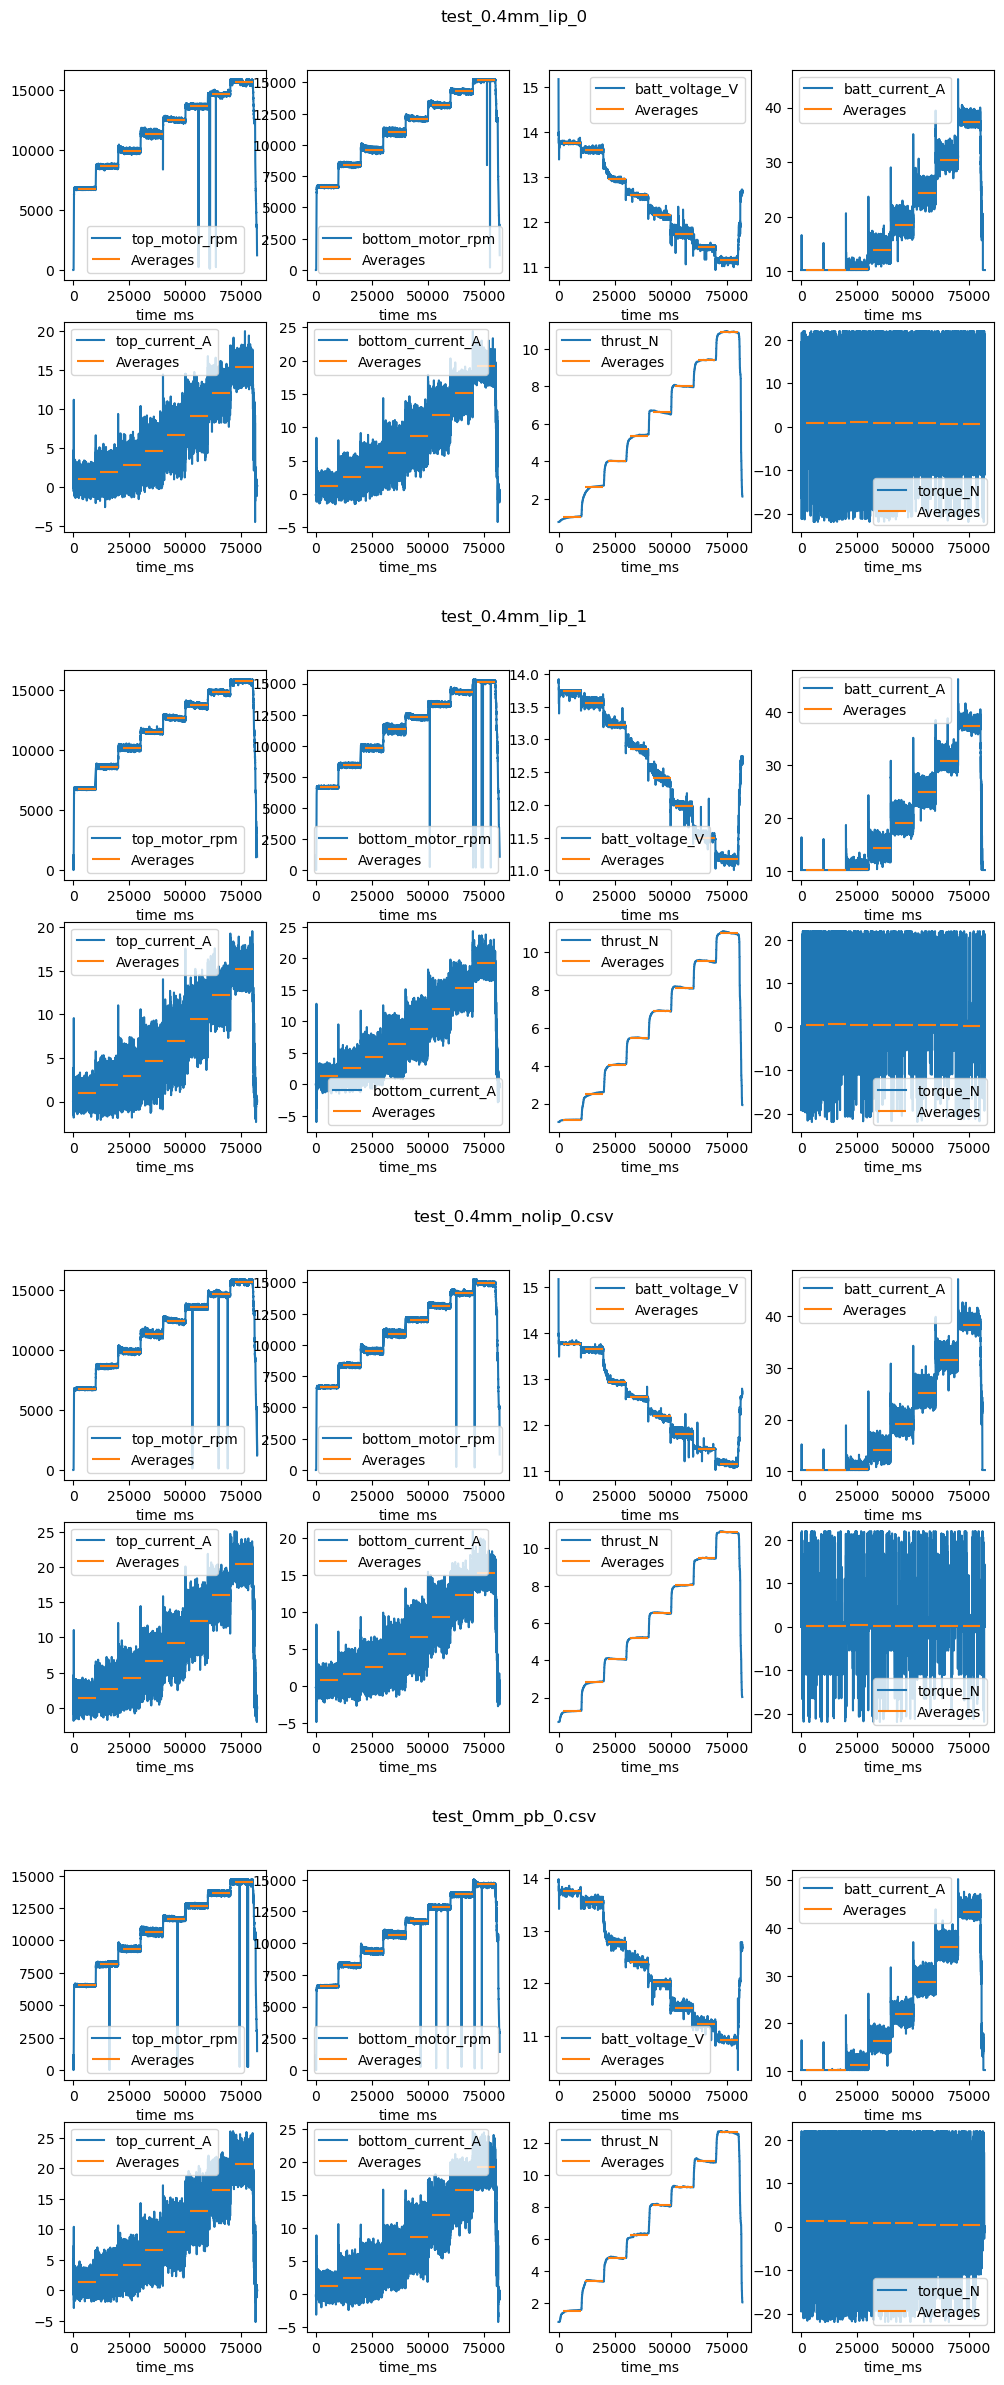

In [29]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index(("test_name", "tip_clearance_mm")).plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [31]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = df_steps["batt_voltage_V"]["std"] / batt_voltage_mean

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "top_rpm": df_steps["top_motor_rpm"]["mean"],
        "bottom_rpm": df_steps["bottom_motor_rpm"]["mean"],
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [32]:
df_thrust_power

rpm_avg     top_rpm  \
test_name              tip_clearance_mm throttle                            
test_0.4mm_lip_0       0.4              30         6728.81325   6796.5200   
                                        40         8531.21225   8643.8155   
                                        50         9761.47950   9929.9990   
                                        60        11172.28650  11350.6825   
                                        70        12311.84950  12530.9965   
                                        80        13422.91250  13658.4785   
                                        90        14492.65175  14684.7450   
                                        100       15429.10375  15686.9745   
test_0.4mm_lip_1       0.4              30         6729.05700   6794.9175   
                                        40         8527.37550   8626.2390   
                                        50         9981.08150  10172.8715   
                                        60        11419.81825  11508.6230   
                                        70        12483.62800  12685.0305   
                                        80        13561.87000  13757.2715   
                                        90        14583.32850  14823.0480   
                                        100       15460.33975  15764.8125   
test_0.4mm_nolip_0.csv 0.4              30         6708.83125   6781.6100   
                                        40         8504.80550   8645.5360   
                                        50         9692.97700   9874.9795   
                                        60        11115.78500  11344.3925   
                                        70        12236.85900  12445.2470   
                                        80        13372.58450  13612.9170   
                                        90        14399.65550  14672.1860   
                                        100       15330.47000  15715.7010   
test_0mm_pb_0.csv      0.0              30         6560.98125   6522.7685   
                                        40         8210.70950   8158.2605   
                                        50         9336.33650   9328.9840   
                                        60        10654.60625  10642.7610   
                                        70        11687.86475  11670.7155   
                                        80        12757.98525  12688.7405   
                                        90        13739.31475  13643.7080   
                                        100       14578.09350  14531.2430   

                                                  bottom_rpm  thrust_mean_g  \
test_name              tip_clearance_mm throttle                              
test_0.4mm_lip_0       0.4              30         6661.1065     102.797923   
                                        40         8418.6090     266.491204   
                                        50         9592.9600     408.888503   
                                        60        10993.8905     547.311172   
                                        70        12092.7025     673.209321   
                                        80        13187.3465     814.755658   
                                        90        14300.5585     957.732768   
                                        100       15171.2330    1110.485686   
test_0.4mm_lip_1       0.4              30         6663.1965     117.348034   
                                        40         8428.5120     257.075370   
                                        50         9789.2915     412.864151   
                                        60        11331.0135     556.212483   
                                        70        12282.2255     701.503516   
                                        80        13366.4685     826.282610   
                                        90        14343.6090     968.523435   
                                        100       15155.8670    1120.578285   
test_0.4mm_no

In [33]:
df_thrust_power_agg = df_thrust_power[(df_thrust_power.index.get_level_values('throttle') >= 60) & (df_thrust_power.index.get_level_values('tip_clearance_mm') != 'Open Air')].groupby('tip_clearance_mm').agg('mean')
df_thrust_power_agg

,rpm_avg,top_rpm,bottom_rpm,thrust_mean_g,batt_power_mean,batt_voltage_mean,hall_current_mean,shunt_power_mean,thrust_power_g_W,shunt_thrust_power_g_W,batt_power_err,thrust_g_err,thrust_power_err
tip_clearance_mm,,,,,,,,,,,,,
0.0,12683.5729,12635.433600,12731.712200,960.272206,292.390341,11.625766,25.595427,335.387445,3.428050,2.915767,11.071170,5.370936,0.143153
0.4,13386.2095,13616.073733,13156.345267,824.387871,257.869070,11.886071,22.078189,295.958863,3.326151,2.827067,10.389621,3.441250,0.147334


<ErrorbarContainer object of 3 artists>

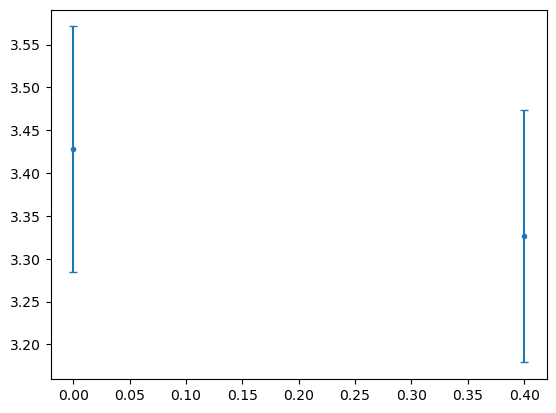

In [34]:
plt.errorbar(x=df_thrust_power_agg.index.get_level_values('tip_clearance_mm'), y="thrust_power_g_W", yerr="thrust_power_err", data=df_thrust_power_agg, fmt='o', capsize=3, markersize=3)

In [35]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

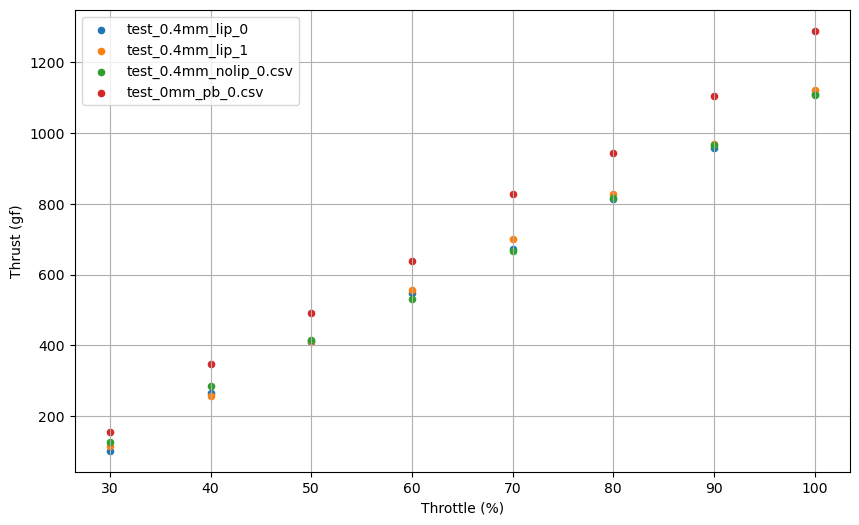

In [36]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", data=grp, label=n, s=20)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.legend()
plt.grid()
plt.show()

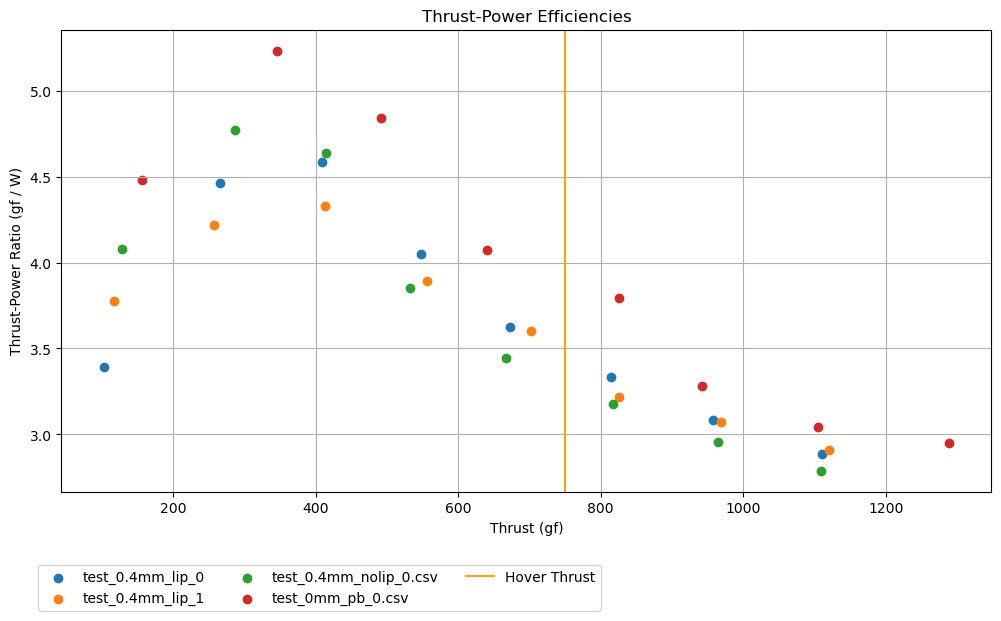

In [37]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

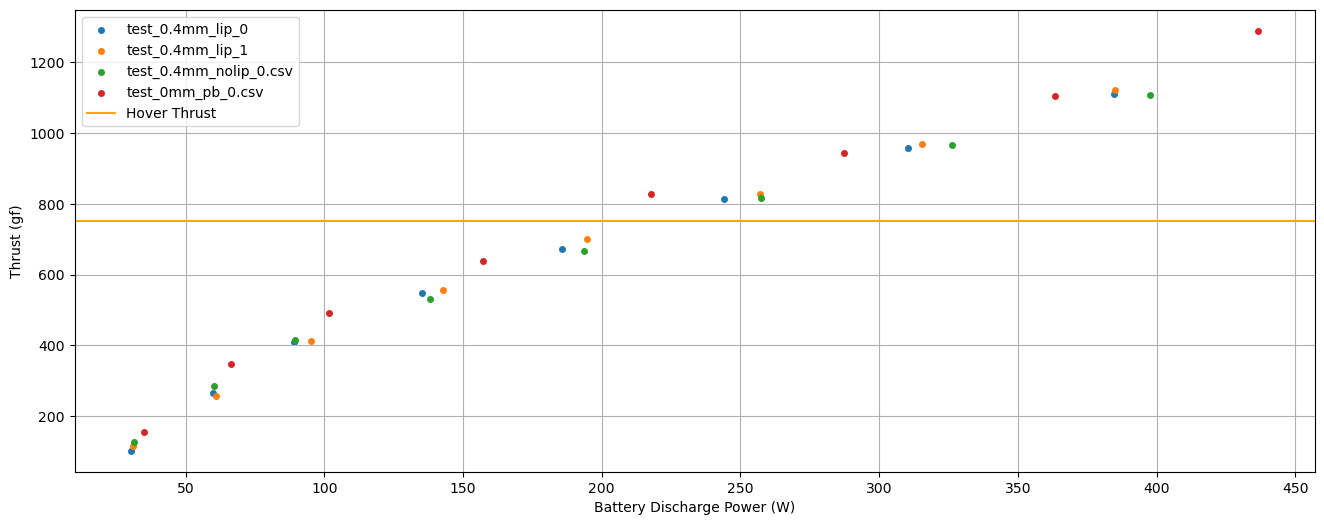

In [38]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="batt_power_mean", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

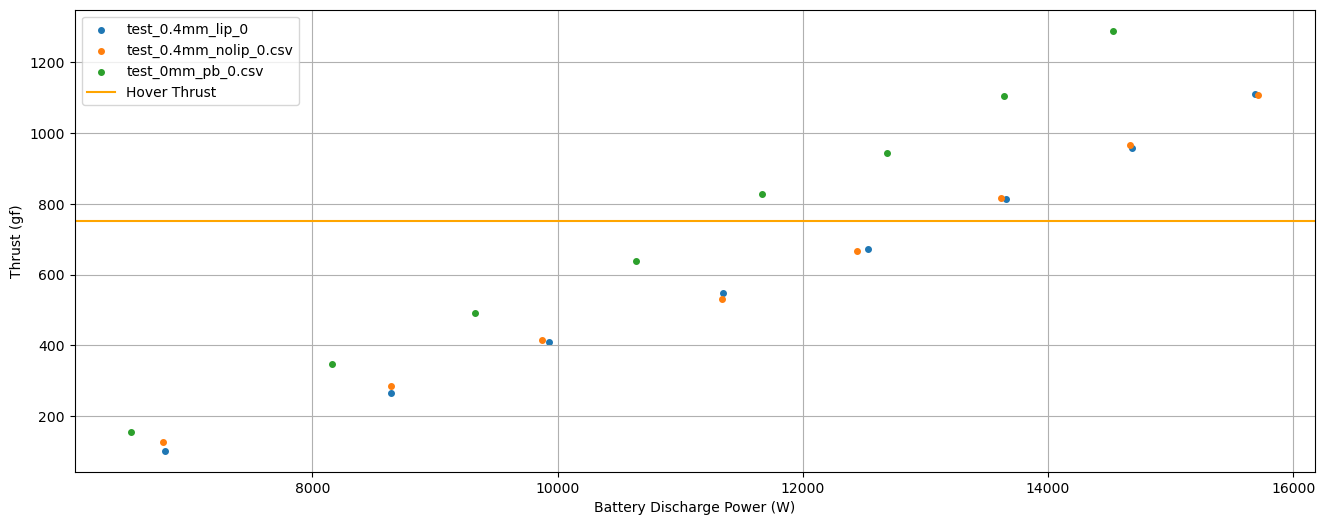

In [24]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="top_rpm", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

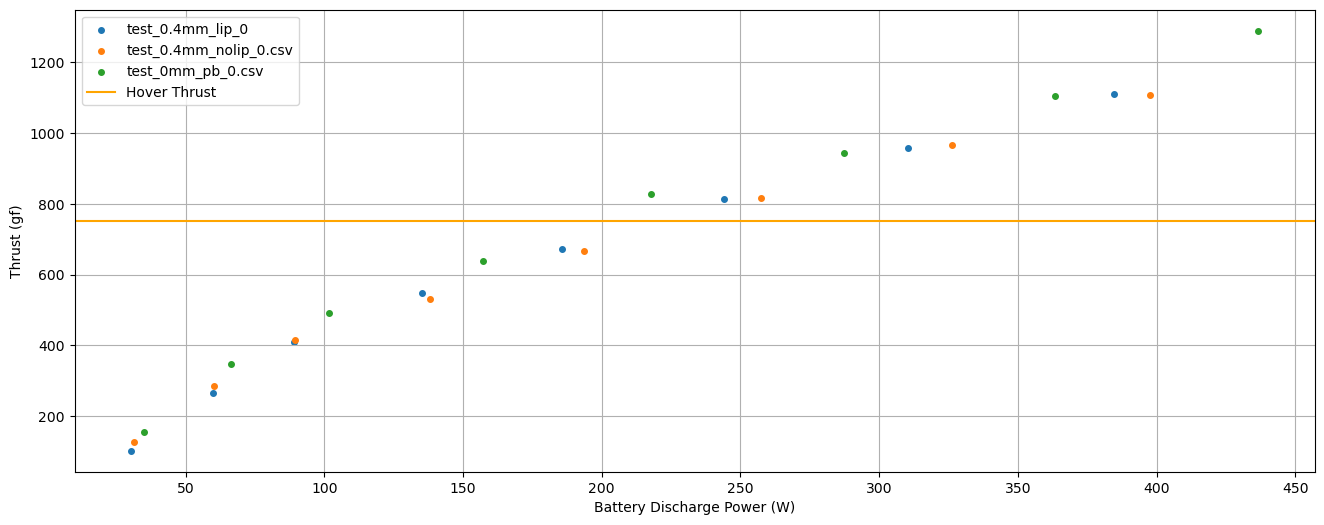

In [25]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="batt_power_mean", y="thrust_mean_g", data=grp, label=n, s=16)
plt.ylabel("Thrust (gf)")
plt.xlabel("Battery Discharge Power (W)")
plt.grid()
plt.axhline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.legend()
plt.show()

# My Stuff

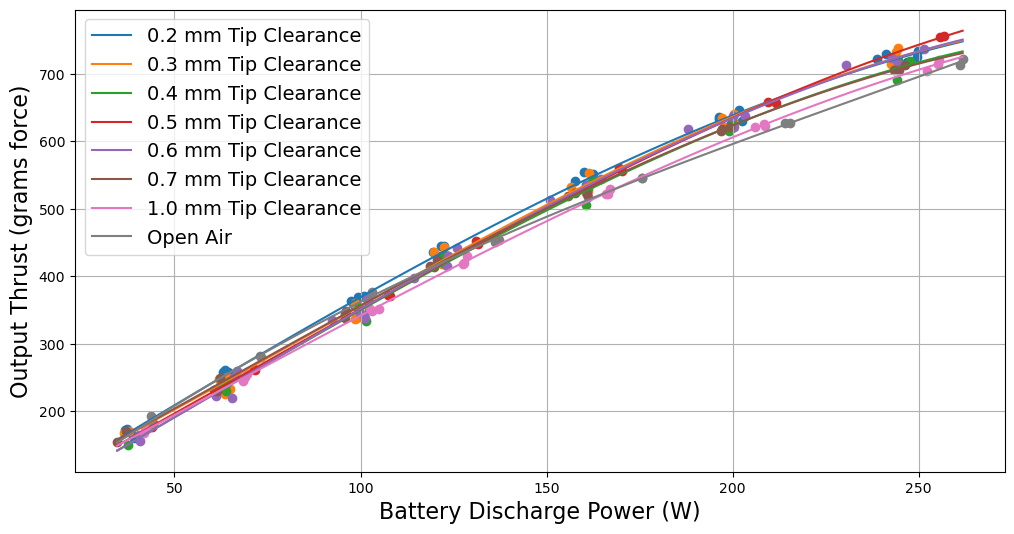

In [801]:
import numpy as np

DEGREE = 3
N = 100
min_thrust = hover_thrust_g - 600
max_thrust = payload_thrust_g + 200

x_label = "batt_power_mean"
y_label = "thrust_mean_g"
err_label = "batt_power_err"
x_min = 1e9
x_max = -1e9


def extract_roi(grp, x_label, ylabel, min_thrust, max_thrust):
    grp = grp[grp["thrust_mean_g"] > min_thrust]
    grp = grp.sort_values("thrust_mean_g")
    x = grp[x_label].to_numpy()
    y = grp[y_label].to_numpy()
    err = grp[err_label].to_numpy()
    return x, y, err


plt.figure(figsize=(12, 6))

# Analyze data.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    x_min = min(x_min, min(x))
    x_max = max(x_max, max(x))

x_dense = np.linspace(x_min, x_max, N)

# Plot inerpolation.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    coeffs = np.polyfit(x, y, DEGREE)
    poly = np.poly1d(coeffs)
    legend_label = str(n) + " mm Tip Clearance"
    if (n == 'Open Air'): legend_label = n

    plt.plot(x_dense, poly(x_dense), label=legend_label)
    plt.scatter(x, y)

plt.xlabel("Battery Discharge Power (W)", fontsize=16)
plt.ylabel("Output Thrust (grams force)", fontsize=16)
plt.grid()
plt.legend(fontsize=14)
# plt.xlim(200, 260)
# plt.ylim(600, 800)
plt.show()